In [10]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Problem set 9

## Part I

The concept that all our estimators have their own distribution, and therefore their own standard deviation, seems like a new concept but we are already familiar with one example:

For $N_{\rm obs}$ normal random variables with mean $\mu$ and standard deviation $\sigma$, our estimate of the mean, $\hat{\mu}$, has a distribution with standard deviation $\sigma/\sqrt{N_{\rm obs}}$. In reality, we do not know $\mu$ or $\sigma$ (if we did, why would we be estimating them!), so we approximate the standard deviation of $\hat{\mu}$ with $\hat{\sigma}/\sqrt{N_{\rm obs}}$. This is called the __standard error of the mean__.

In this problem, we will explore whether the nonparametric bootstrap estimate of the standard deviation of $\hat{\mu}$ agrees with the familiar formula of the standard error of the mean.


### 1.1 A single nonparametric bootstrap

The following code generates a sample of $N_{\rm obs}=20$ normal random variables.


In [47]:
NObs <- 20
N.resample <- 1000
data.train <- rnorm(NObs,178.1,12.1)

Perform a non-parametric boostrap, say with 1000 resamplings, on the above data and estimate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ each time. Output the standard deviation of $\hat{\mu}$. (In this block, the sample size is fixed at $N_{\rm obs}=20$.)

In [31]:
m.vec = 1:N.resample
std.vec = 1:N.resample
for (i in 1:N.resample) {
    sample.bootstrap <- data.train[sample(NObs,replace=TRUE)]
    m.vec[i] = mean(sample.bootstrap)
    std.vec[i] = sd(sample.bootstrap)
}
mean(m.vec)
sd(m.vec)
mean(std.vec)/sqrt(NObs)

[1] 178.7673

[1] 2.251699

[1] 2.241132

Repeat the above, but in a loop, with $N_{\rm obs}$ ranging from 10 to 10000. Compute the standard deviation of $\hat{\mu}$ from non-parametric bootstrap for each value of $N_{\rm obs}$. Store the value of $\hat{\sigma}$ for each value of $N_{\rm obs}$ (because you will need it below).

Plot the standard deviation of $\hat{\mu}$ from non-parametric bootstrap versus $N_{\rm obs}$.

On the same axis, plot $\hat{\sigma}/\sqrt{N_{\rm obs}}$ versus $N_{\rm obs}$.

Do they agree?

In [97]:
bootstrap.simple <- function(df, N.repeat, N.obs) {
    mean.vec <- 1:N.repeat
    stdev.vec <- 1:N.repeat
    for (i in 1:N.repeat) {
        resample.bootstrap <- df[sample(N.obs,replace=TRUE)]
        mean.vec[i] <- mean(resample.bootstrap)
        stdev.vec[i] <- sd(resample.bootstrap)
    }
    data.frame('mean'=mean.vec,'std'=stdev.vec)
}

In [32]:
# non-optimized version

NObs.vec <- seq(10,10000,by=500)
n.looper <- 1:length(NObs.vec)
m.NObs.vec <- 1:length(NObs.vec)
m.std.NObs.vec <- 1:length(NObs.vec)
std.NObs.vec <- 1:length(NObs.vec)
for (n in n.looper){
    data.train <- rnorm(NObs.vec[n],178.1,12.1)
    m.vec = 1:N.resample
    std.vec = 1:N.resample
    for (i in 1:N.resample) {
        sample.bootstrap <- data.train[sample(NObs.vec[n],replace=TRUE)]
        m.vec[i] = mean(sample.bootstrap)
        std.vec[i] = sd(sample.bootstrap)
    }
    m.NObs.vec[n] <- mean(m.vec)
    m.std.NObs.vec[n] <- sd(m.vec)
    std.NObs.vec[n] <- mean(std.vec)
}

In [53]:
# optimized-version

NObs.vec <- seq(10,10000,by=500)
n.looper <- 1:length(NObs.vec)
m.NObs.vec <- 1:length(NObs.vec)
m.std.NObs.vec <- 1:length(NObs.vec)
std.NObs.vec <- 1:length(NObs.vec)

for (n in n.looper){
    data.train <- rnorm(NObs.vec[n],178.1,12.1)
    df.n <- bootstrap.simple(data.train, N.resample, NObs.vec[n])
    m.NObs.vec[n] <- mean(df.n$mean)
    m.std.NObs.vec[n] <- sd(df.n$mean)
    std.NObs.vec[n] <- mean(df.n$std)
}

In [50]:
std.NObs.vec/sqrt(NObs.vec)

[1] 5.6744164 0.5279264 0.3725667 0.3133171 0.2720939 0.2400229 0.2245796
 [8] 0.2034702 0.1894600 0.1788281 0.1722074 0.1637446 0.1546331 0.1490579
[15] 0.1428554 0.1412271 0.1356229 0.1293973 0.1273496 0.1253758

Joining, by = c("NObs", "std.mean", "deviationType")

Warning message:
"Column `deviationType` joining factors with different levels, coercing to character vector"


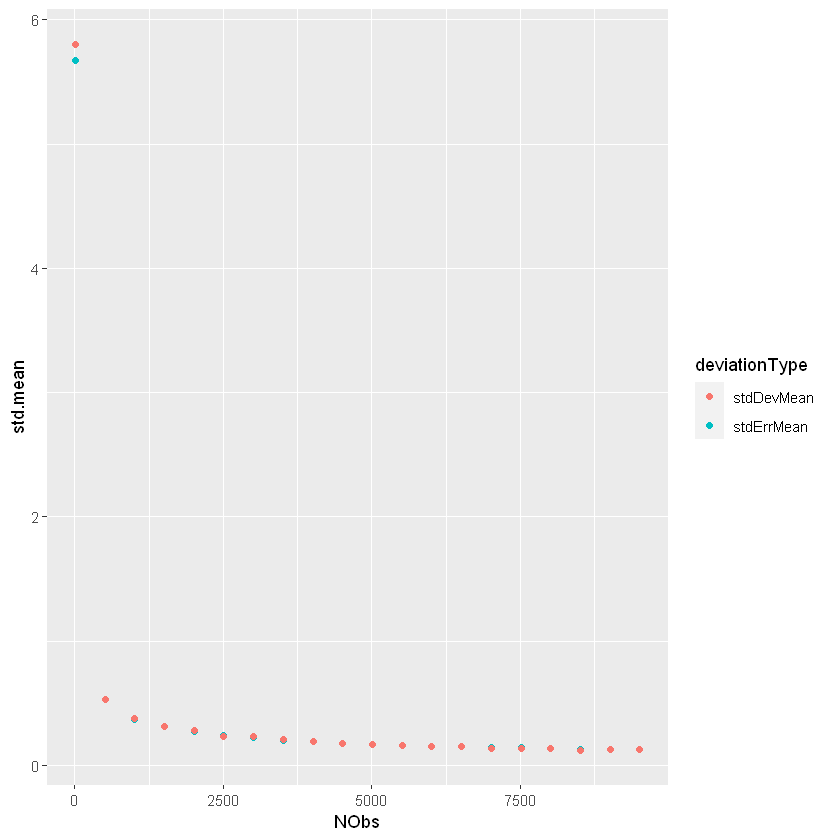

In [51]:
NObs1.df <- data.frame("NObs"=NObs.vec,"std.mean"=std.NObs.vec/sqrt(NObs.vec),"deviationType"="stdErrMean")
NObs2.df <- data.frame("NObs"=NObs.vec,"std.mean"=m.std.NObs.vec,"deviationType"="stdDevMean")
NObs.df <- full_join(NObs1.df,NObs2.df)
ggplot(NObs.df,aes(x=NObs,y=std.mean,colour=deviationType))+geom_point()

# Part II: Bootstrap on coefficient of linear regression

The code below simulates some linear data with noise. Linear regression using lm will yield estimates for the parameters beta0 and beta1 (and sigma, which we will not focus on in this problem). 

(Intercept) 
   10.84272

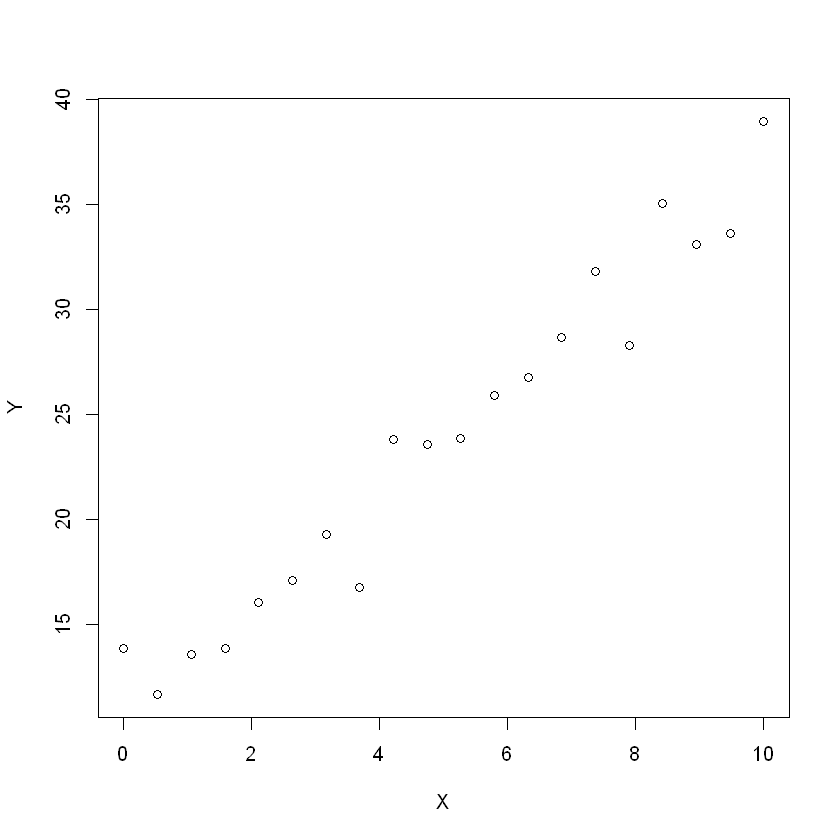

In [61]:
# Simulate some linear data with noise
NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)
df <- data.frame(X,Y)
lr <- lm(Y ~ X, df)
lr$coefficients[1]

In a loop, repeat the simulation and perform lm estimation, 1000 times. This will yield a distribution of estimates for beta_0 and beta_1. Plot histograms of these. Output the quantiles of these. (Note in reality one would not have this ability.)

In [107]:
N.repl <- 1000



beta.0.vec <- 1:N.repl
beta.1.vec <- 1:N.repl
beta.looper <- 1:N.repl

for (i in beta.looper) {
    X <- seq(0,10,length=NObs)
    eps <- rnorm(NObs,0,sigma)

    Y <- beta0 + beta1*X +eps
    df <- data.frame(X,Y)
    lr <- lm(Y ~ X, df)
    beta.0.vec[i] <- lr$coefficients[1]
    beta.1.vec[i] <- lr$coefficients[2]
}

In [99]:
beta.0.df <- data.frame("tag"="beta.0","coeff.value"=beta.0.vec)%>%
    group_by(tag, coeff.value)
beta.1.df <- data.frame("tag"="beta.1","coeff.value"=beta.1.vec) %>%
    group_by(tag, coeff.value)

In [25]:
head(beta.0.df)

tag,coeff.value
<fct>,<dbl>
beta.0,9.743193
beta.0,10.023143
beta.0,11.711929
beta.0,10.357894
beta.0,10.765914
beta.0,9.415350


Joining, by = c("tag", "coeff.value")

Warning message:
"Column `tag` joining factors with different levels, coercing to character vector"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



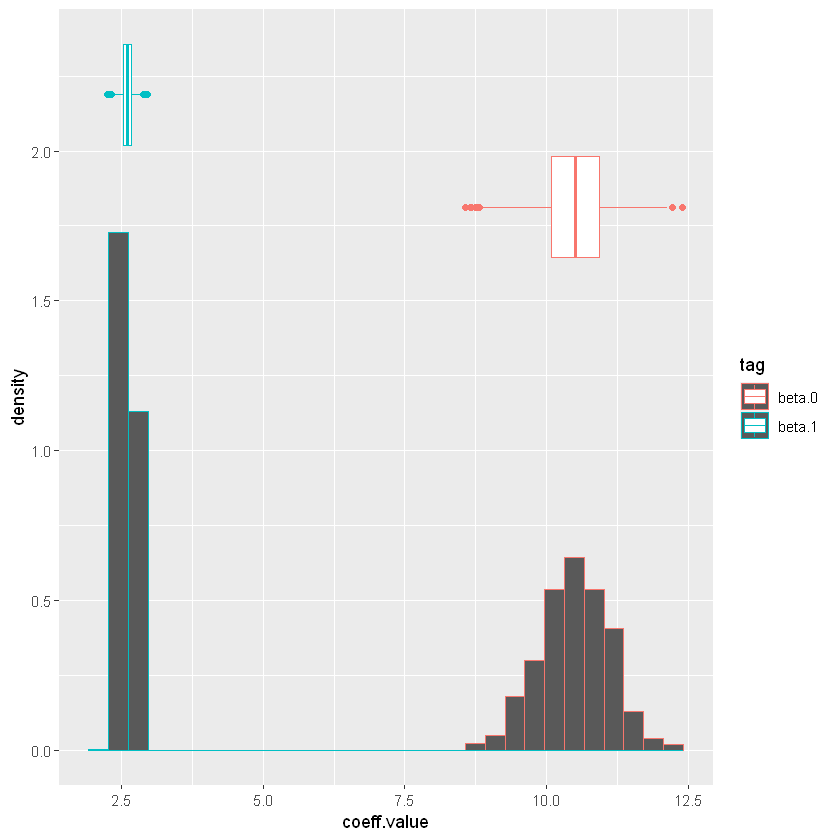

In [43]:
beta.df <- full_join(beta.0.df,beta.1.df) %>%
    group_by(tag,coeff.value)
ggplot(beta.df,aes(x=coeff.value,colour=tag)) + geom_histogram(aes(y=..density..)) + geom_boxplot(aes(y=2)) 

In reality, assume we only have 1 instance (in this example, with NObs=20 data points). 

Perform the simulation once to generate one data set with 20 points.

In [80]:
X.single <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

Y.single <- beta0 + beta1*X +eps
df.single <- data.frame(X.single,Y.single)
lr.single <- lm(Y ~ X, df.single)

Write code to perform non-parametric bootstrap on this data set. For a linear model like this, the resampling should be random pairs of X,Y data (so, to be clear, the resampling does not mix an X-value with a Y-value it did not belong with). 

Using the distribution of estimates for beta_0 and beta_1 from this non-parametric bootstrap, plot histograms and output quantiles. Compare with the "true" distributions from above.

In [81]:
bootstrap.simple.xy <- function(df, N.repeat, N.obs) {
    beta.0.vec <- 1:N.repeat
    beta.1.vec <- 1:N.repeat
    for (i in 1:N.repeat) {
        resample.bootstrap <- df[sample(N.obs,replace=TRUE),]
        lr.bootstrap <- lm(Y ~ X, resample.bootstrap)
        beta.0.vec[i] <- lr.bootstrap$coefficients[1]
        beta.1.vec[i] <- lr.bootstrap$coefficients[2]
    }
    data.frame('beta.0'=beta.0.vec,'beta.1'=beta.1.vec)
}

In [112]:
beta.0.s.vec <- 1:N.repl
beta.1.s.vec <- 1:N.repl
for (i in 1:N.repl) {
    resample.bootstrap <- df[sample(NObs,replace=TRUE),]
    lr.bootstrap <- lm(Y ~ X, resample.bootstrap)
    beta.0.s.vec[i] <- lr.bootstrap$coefficients[1]
    beta.1.s.vec[i] <- lr.bootstrap$coefficients[2]
}
df.single.beta.0 <- data.frame('tag'='beta.0','coeff.value'=beta.0.s.vec)
df.single.beta.1 <- data.frame('tag'='beta.1','coeff.value'=beta.1.s.vec)
df.single.bootstrap <- full_join(df.single.beta.0,df.single.beta.1) %>%
    group_by(tag,coeff.value)

#df.single.bootstrap <- bootstrap.simple.xy(df.single, N.repl, NObs)

Joining, by = c("tag", "coeff.value")

Warning message:
"Column `tag` joining factors with different levels, coercing to character vector"


In [129]:
beta.0.df <- data.frame("tag"="beta.0","coeff.value"=beta.0.vec, "bootstrapQ"=0) # ,"bootstrapQ"=0
beta.1.df <- data.frame("tag"="beta.1","coeff.value"=beta.1.vec, "bootstrapQ"=0) # ,"bootstrapQ"=0
beta.0.df.single <- data.frame("tag"="beta.0.bootstrap","coeff.value"=beta.0.s.vec, "bootstrapQ"=1) #, "bootstrapQ"=1
beta.1.df.single <- data.frame("tag"="beta.1.bootstrap","coeff.value"=beta.1.s.vec, "bootstrapQ"=1) #, "bootstrapQ"=1
beta.df <- rbind(beta.0.df, beta.1.df, beta.0.df.single, beta.1.df.single)

In [119]:
head(beta.df)

,tag,coeff.value,bootstrapQ
,<fct>,<dbl>,<dbl>
1,beta.0,9.887232,0
2,beta.0,10.874489,0
3,beta.0,9.611564,0
4,beta.0,10.755159,0
5,beta.0,10.175739,0
6,beta.0,10.668917,0


In [134]:
p <- ggplot(beta.df, aes(x=coeff.value,colour=tag)) + 
    geom_histogram(aes(y=..density..)) + 
    geom_boxplot(aes(y=2.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



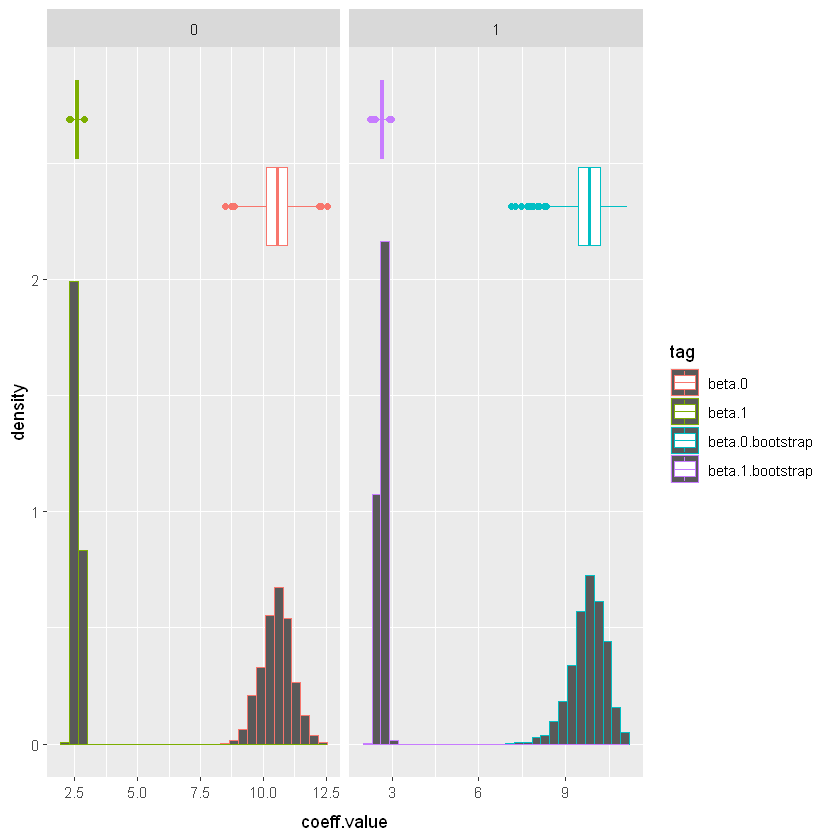

In [140]:
p + facet_grid(cols=vars(bootstrapQ),scales = "free")